# 🧠 Extrovert vs. Introvert Personality Traits Dataset

## 📋 Overview

Dive into the **Extrovert vs. Introvert Personality Traits Dataset**, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of **extroversion** and **introversion**, making it a valuable resource for:

- Psychologists  
- Data scientists  
- Researchers studying social behavior  
- Personality prediction  
- Data preprocessing techniques  

---

## 🧩 Context

Personality traits like **extroversion** and **introversion** shape how individuals interact with their social environments. This dataset provides insights into behaviors such as:

- Time spent alone  
- Social event attendance  
- Social media engagement  

These insights can support applications in:

- Psychology  
- Sociology  
- Marketing  
- Machine Learning  

Whether you're predicting personality types or analyzing social patterns, this dataset is your gateway to uncovering fascinating insights.

---

## 📊 Dataset Details

- **Size**: 2,900 rows × 8 columns

### 🔑 Features:

| Feature | Description |
|--------|-------------|
| `Time_spent_Alone` | Hours spent alone daily (0–11) |
| `Stage_fear` | Presence of stage fright (`Yes` / `No`) |
| `Social_event_attendance` | Frequency of social events (0–10) |
| `Going_outside` | Frequency of going outside (0–7) |
| `Drained_after_socializing` | Feeling drained after socializing (`Yes` / `No`) |
| `Friends_circle_size` | Number of close friends (0–15) |
| `Post_frequency` | Social media post frequency (0–10) |
| `Personality` | **Target variable**: `Extrovert` / `Introvert` |

---

> ✅ Ideal for classification tasks, EDA, Model Analysis and understanding psychological behavior using data.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv(r"E:\celebal internship\week6\personality_datasert.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [15]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [16]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].round()


In [17]:
for col in df.columns:
    print(df[col].value_counts().sort_values())
    print('-'*50)

Time_spent_Alone
11.0    140
6.0     150
8.0     180
4.0     190
7.0     190
10.0    196
9.0     206
5.0     243
1.0     326
3.0     353
2.0     357
0.0     369
Name: count, dtype: int64
--------------------------------------------------
Stage_fear
Yes    1410
No     1490
Name: count, dtype: int64
--------------------------------------------------
Social_event_attendance
10.0     14
8.0     206
5.0     224
9.0     236
6.0     239
7.0     239
4.0     317
3.0     317
1.0     322
0.0     378
2.0     408
Name: count, dtype: int64
--------------------------------------------------
Going_outside
7.0    174
3.0    275
6.0    335
4.0    359
5.0    374
1.0    429
2.0    456
0.0    498
Name: count, dtype: int64
--------------------------------------------------
Drained_after_socializing
Yes    1407
No     1493
Name: count, dtype: int64
--------------------------------------------------
Friends_circle_size
15.0     59
0.0     106
13.0    123
7.0     133
11.0    134
9.0     135
14.0    144
10.0   

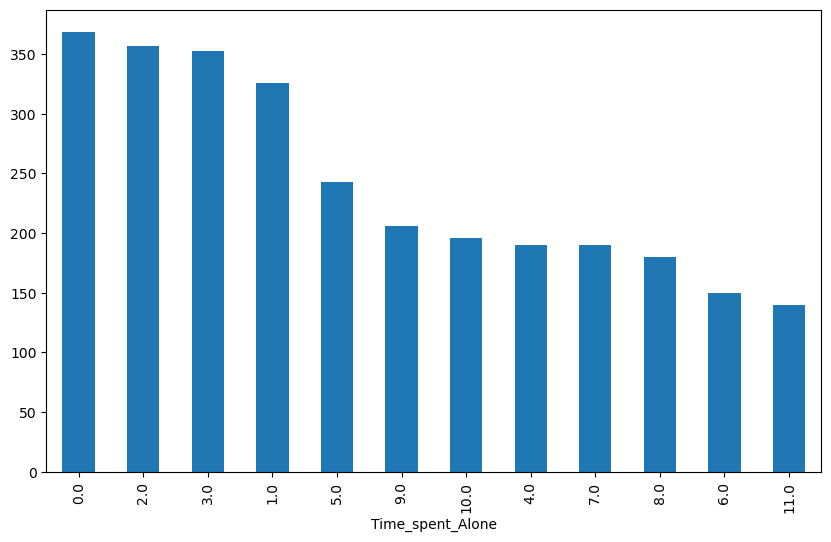

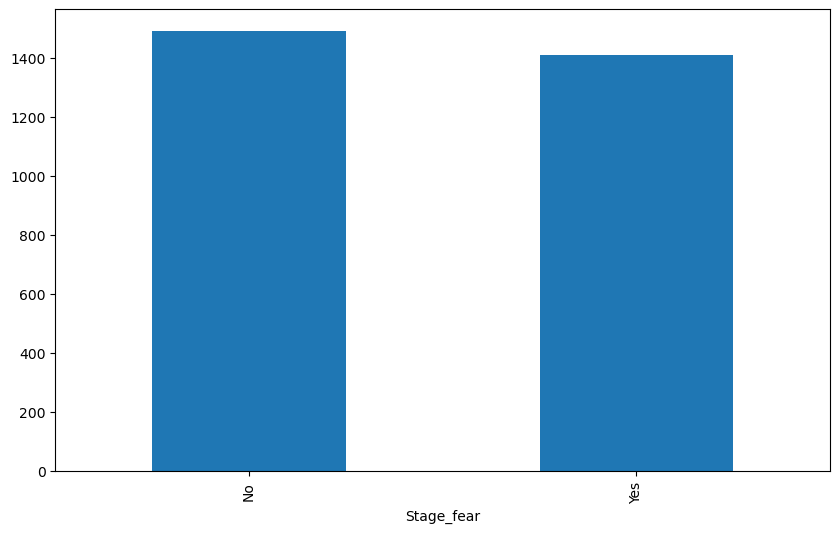

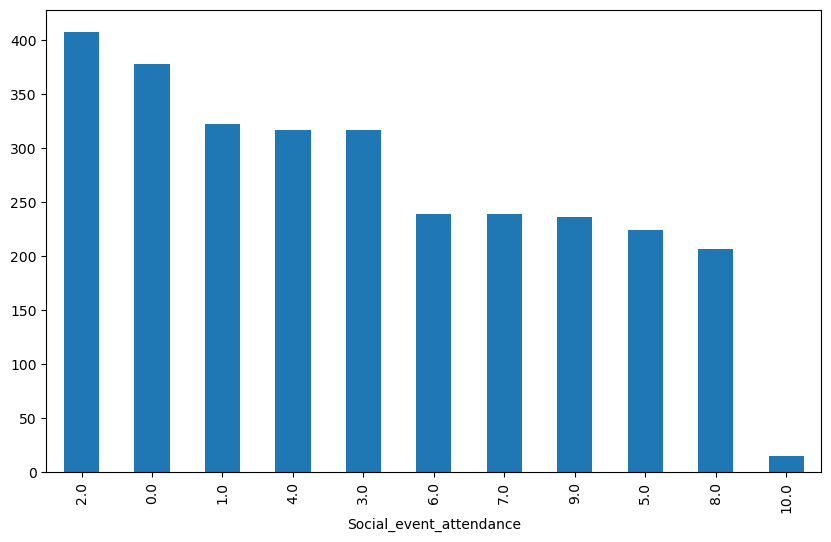

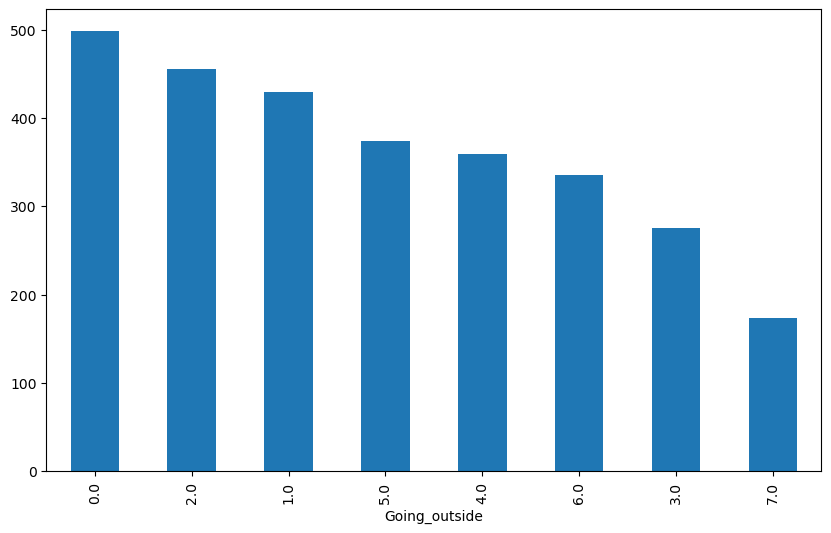

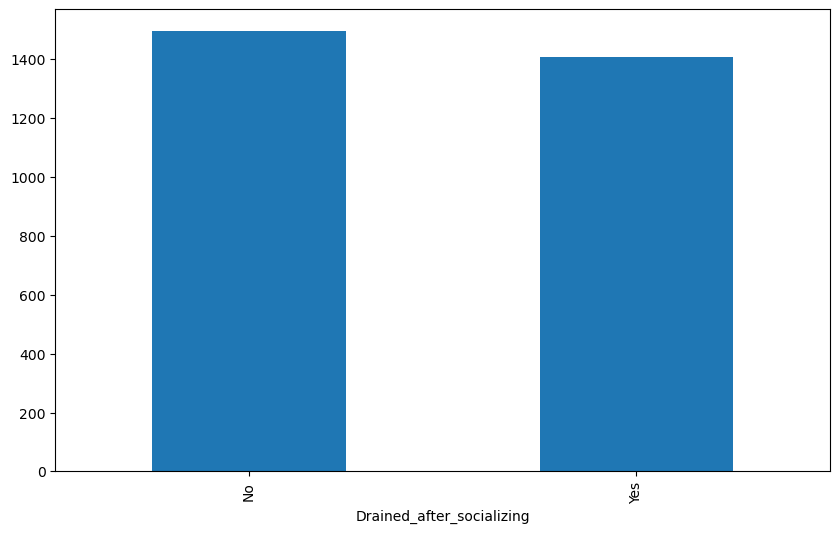

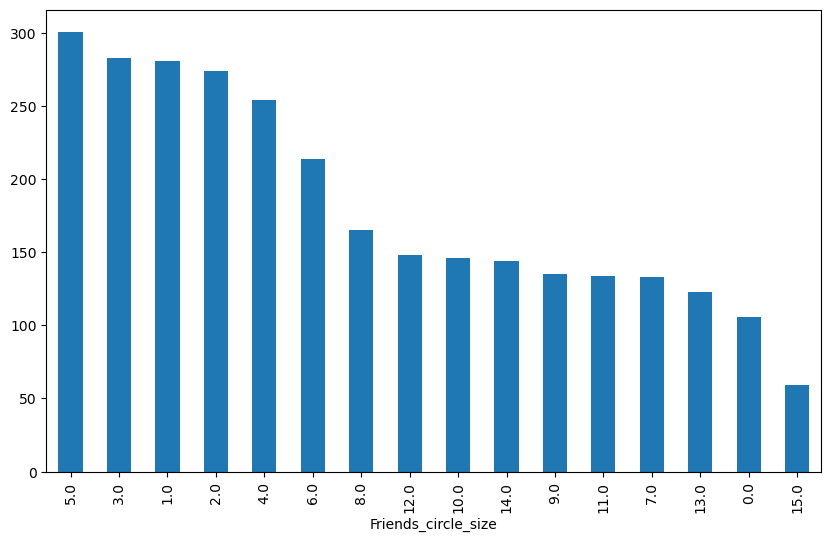

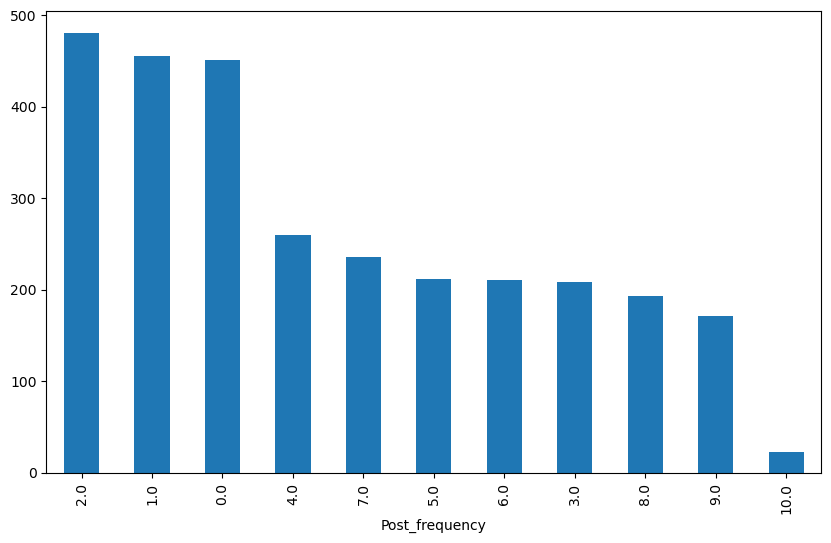

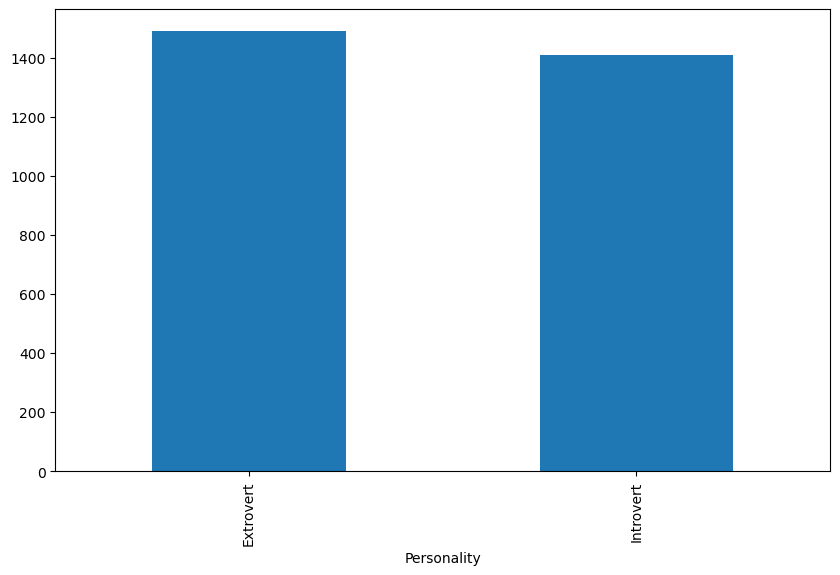

In [18]:
for col in df.columns:
    plt.figure(figsize = (10,6))
    df[col].value_counts().plot(kind = 'bar')

In [19]:
for i in df.columns:
    for j in df.columns:
        if i!=j:
            print(pd.crosstab(df[i] , df[j] , normalize = 'all' , margins = True)*100)
            print('--'*40)

Stage_fear               No        Yes         All
Time_spent_Alone                                  
0.0               12.724138   0.000000   12.724138
1.0               11.241379   0.000000   11.241379
2.0               12.310345   0.000000   12.310345
3.0               12.172414   0.000000   12.172414
4.0                0.793103   5.758621    6.551724
5.0                1.448276   6.931034    8.379310
6.0                0.103448   5.068966    5.172414
7.0                0.068966   6.482759    6.551724
8.0                0.172414   6.034483    6.206897
9.0                0.172414   6.931034    7.103448
10.0               0.103448   6.655172    6.758621
11.0               0.068966   4.758621    4.827586
All               51.379310  48.620690  100.000000
--------------------------------------------------------------------------------
Social_event_attendance        0.0        1.0        2.0        3.0  \
Time_spent_Alone                                                      
0.0         

*Simple EDA to get the knowledge and find trends and insight on the dataset*

### Doing one hot encoding on the categorical columns

In [20]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,False,False,False
1,9.0,0.0,0.0,0.0,3.0,True,True,True
2,9.0,1.0,2.0,5.0,2.0,True,True,True
3,0.0,6.0,7.0,14.0,8.0,False,False,False
4,3.0,9.0,4.0,8.0,5.0,False,False,False


## Splitting and training diffrent ML model and doing hyperparameter tunig via GridSearchCV, RandomizedSearchCV

In [21]:
df.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency', 'Stage_fear_Yes',
       'Drained_after_socializing_Yes', 'Personality_Introvert'],
      dtype='object')

In [22]:
X = df.drop('Personality_Introvert' , axis = True)
y = df.Personality_Introvert

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_finetuning_gscv(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "LDA": LDA(),
        "SVC": SVC(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
    }

    param_grid = {
        "Logistic Regression": {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'lbfgs', 'sag', 'saga']
        },
        "LDA": {'solver': ['eigen', 'lsqr', 'svd']},
        "SVC": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
        "KNN": {'n_neighbors': [1,3, 5,6, 7,9,10,11,15]},
        "Random Forest": {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]},
        "Decision Tree": {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 5, 10, 20]
        }
    }

    base_scores = {}
    tuned_scores = {}

    best_models = {}

    for name, model in models.items():
        print(f"\nTraining and evaluating: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        base_scores[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        }

        if name in param_grid:
            print(f"→ Running GridSearchCV for {name}")
            try:
                grid = GridSearchCV(model, param_grid[name], cv=15, scoring='accuracy', error_score='raise')
                grid.fit(X_train, y_train)
                best_model = grid.best_estimator_
                best_models[name] = best_model
                tuned_pred = best_model.predict(X_test)

                tuned_scores[name] = {
                    'Accuracy': accuracy_score(y_test, tuned_pred),
                    'Precision': precision_score(y_test, tuned_pred, average='weighted', zero_division=0),
                    'Recall': recall_score(y_test, tuned_pred, average='weighted'),
                    'F1 Score': f1_score(y_test, tuned_pred, average='weighted')
                }

                print("Best Params:", grid.best_params_)
                print(classification_report(y_test, tuned_pred))
            except Exception as e:
                print(f"Error during GridSearchCV for {name}: {e}")
                tuned_scores[name] = base_scores[name]
                best_models[name] = model
        else:
            tuned_scores[name] = base_scores[name]
            best_models[name] = model

    return base_scores, tuned_scores, best_models


In [15]:
base_scores, tuned_scores, best_models = model_finetuning_gscv(X_train, y_train, X_test, y_test)


Training and evaluating: Logistic Regression
→ Running GridSearchCV for Logistic Regression
Best Params: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

       False       0.94      0.92      0.93       302
        True       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


Training and evaluating: LDA
→ Running GridSearchCV for LDA
Best Params: {'solver': 'eigen'}
              precision    recall  f1-score   support

       False       0.92      0.92      0.92       302
        True       0.91      0.91      0.91       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580


Training and evaluating: SVC
→ Running GridSearchCV for SVC
Best Params: {'C': 0.1, 'kernel': 'rbf'}
          

### Plotting all the evalutaion metrics before and after tuning the model

In [16]:
def plot_model_scores(base_scores, tuned_scores):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    models = list(base_scores.keys())

    for metric in metrics:
        base_vals = [base_scores[model][metric] for model in models]
        tuned_vals = [tuned_scores[model][metric] for model in models]

        x = np.arange(len(models))
        width = 0.35

        plt.figure(figsize=(12, 6))
        plt.bar(x - width/2, base_vals, width, label='Base Model', color='skyblue')
        plt.bar(x + width/2, tuned_vals, width, label='Tuned Model', color='orange')

        plt.ylabel(metric)
        plt.title(f'{metric} Comparison Before and After Tuning')
        plt.xticks(x, models, rotation=45)
        plt.ylim(0, 1.05)
        plt.legend()
        plt.tight_layout()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()




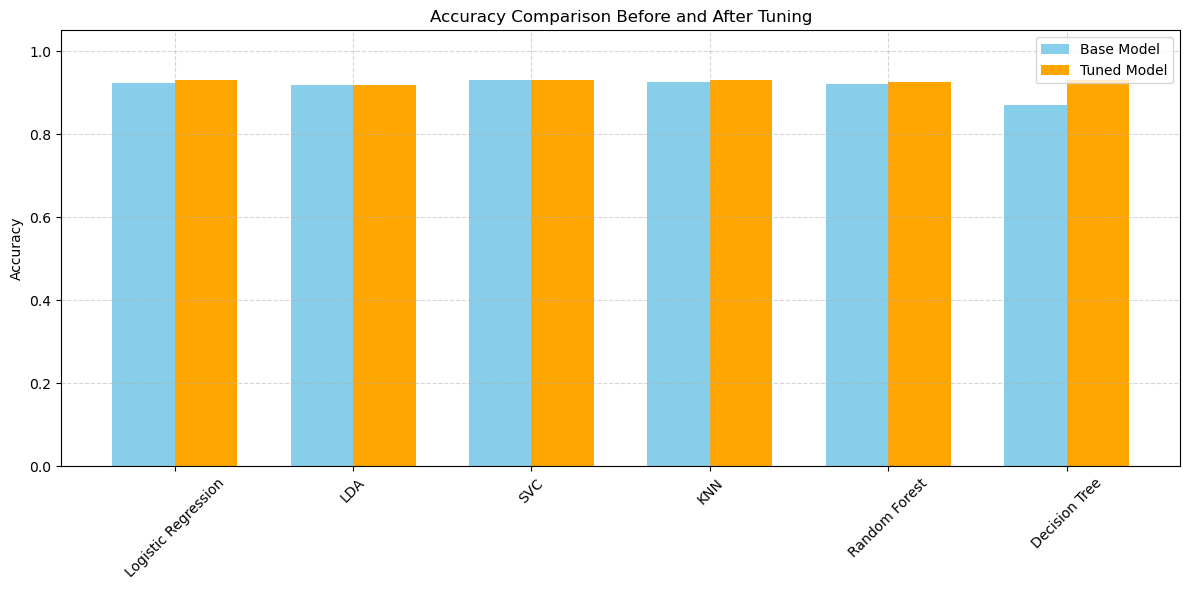

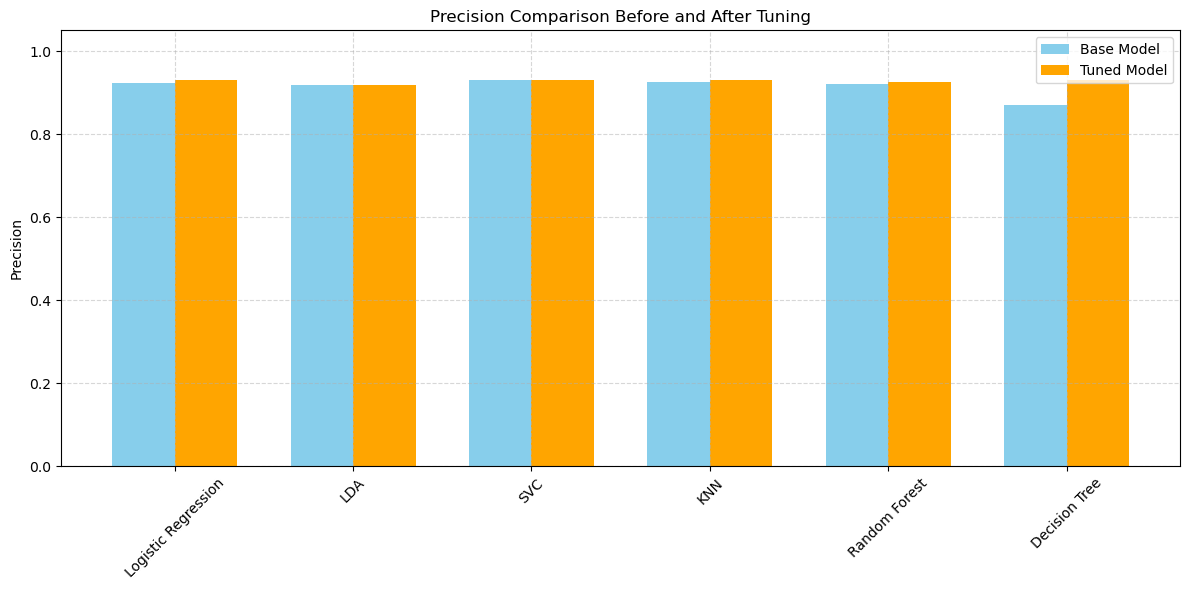

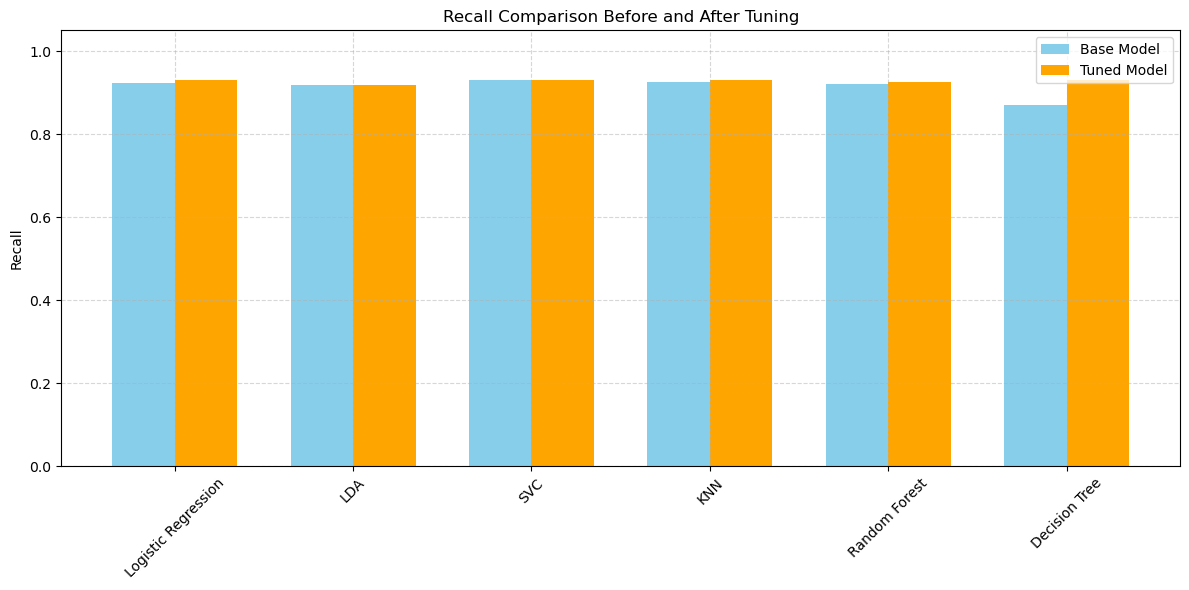

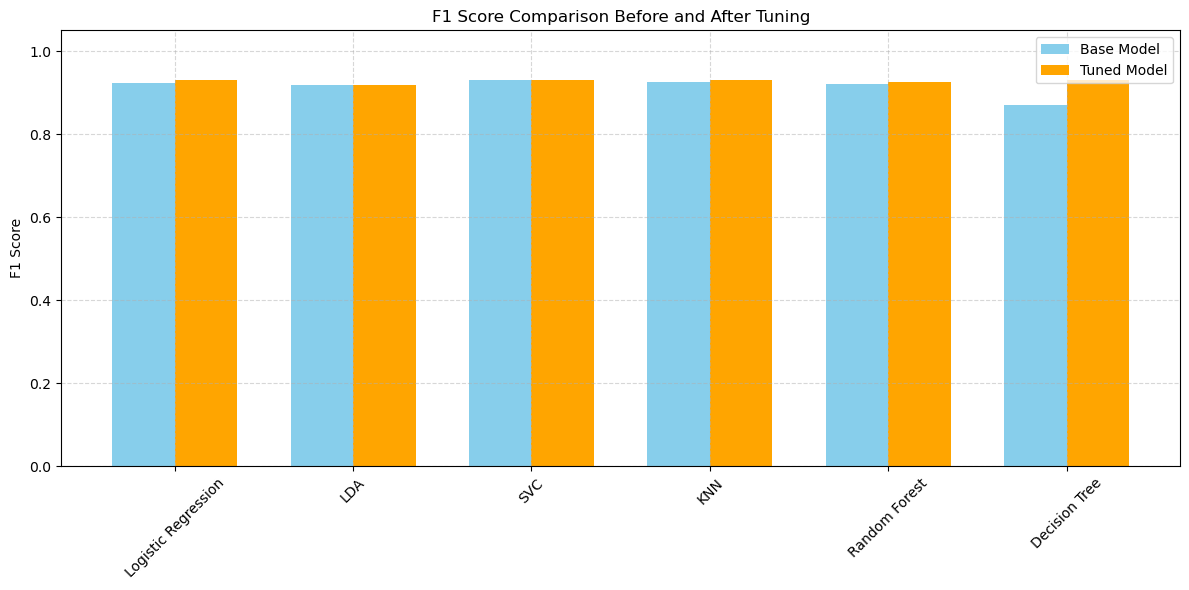

In [17]:
# Plot all metrics
plot_model_scores(base_scores, tuned_scores)

In [18]:
def model_finetuning_rscv(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "LDA": LDA(),
        "SVC": SVC(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
    }
    param_grid = {
        "Logistic Regression": {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'lbfgs', 'sag', 'saga']
        },
        "LDA": {'solver': ['eigen', 'lsqr', 'svd']},
        "SVC": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
        "KNN": {'n_neighbors': [1,3,5 ,6, 7,9,10,11,15]},
        "Random Forest": {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]},
        "Decision Tree": {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 5, 10, 20]
        }
    }
    base_scores = {}
    tuned_scores = {}
    best_models = {}
    
    for name, model in models.items():
        print(f"\nTraining and evaluating: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        base_scores[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        }
        
        if name in param_grid:
            print(f"→ Running RandomizedSearchCV for {name}")
            try:
                # Fixed: Added n_iter parameter and proper parameter order
                grid = RandomizedSearchCV(
                    estimator=model, 
                    param_distributions=param_grid[name], 
                    n_iter=15,  # Number of parameter settings sampled
                    scoring='accuracy', 
                    cv=15,
                    random_state=42,  # For reproducibility
                    n_jobs=-1  # Use all available processors
                )
                grid.fit(X_train, y_train)
                best_model = grid.best_estimator_
                best_models[name] = best_model
                tuned_pred = best_model.predict(X_test)
                tuned_scores[name] = {
                    'Accuracy': accuracy_score(y_test, tuned_pred),
                    'Precision': precision_score(y_test, tuned_pred, average='weighted', zero_division=0),
                    'Recall': recall_score(y_test, tuned_pred, average='weighted'),
                    'F1 Score': f1_score(y_test, tuned_pred, average='weighted')
                }
                print("Best Params:", grid.best_params_)
                print(classification_report(y_test, tuned_pred))
            except Exception as e:
                print(f"Error during RandomizedSearchCV for {name}: {e}")
                tuned_scores[name] = base_scores[name]
                best_models[name] = model
        else:
            tuned_scores[name] = base_scores[name]
            best_models[name] = model
    
    return base_scores, tuned_scores, best_models

In [19]:
base_scores1, tuned_scores1, best_models1 = model_finetuning_rscv(X_train, y_train, X_test, y_test)


Training and evaluating: Logistic Regression
→ Running RandomizedSearchCV for Logistic Regression
Best Params: {'solver': 'liblinear', 'C': 0.1}
              precision    recall  f1-score   support

       False       0.94      0.92      0.93       302
        True       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


Training and evaluating: LDA
→ Running RandomizedSearchCV for LDA
Best Params: {'solver': 'eigen'}
              precision    recall  f1-score   support

       False       0.92      0.92      0.92       302
        True       0.91      0.91      0.91       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580


Training and evaluating: SVC
→ Running RandomizedSearchCV for SVC
Best Params: {'kernel': 'rbf', 'C

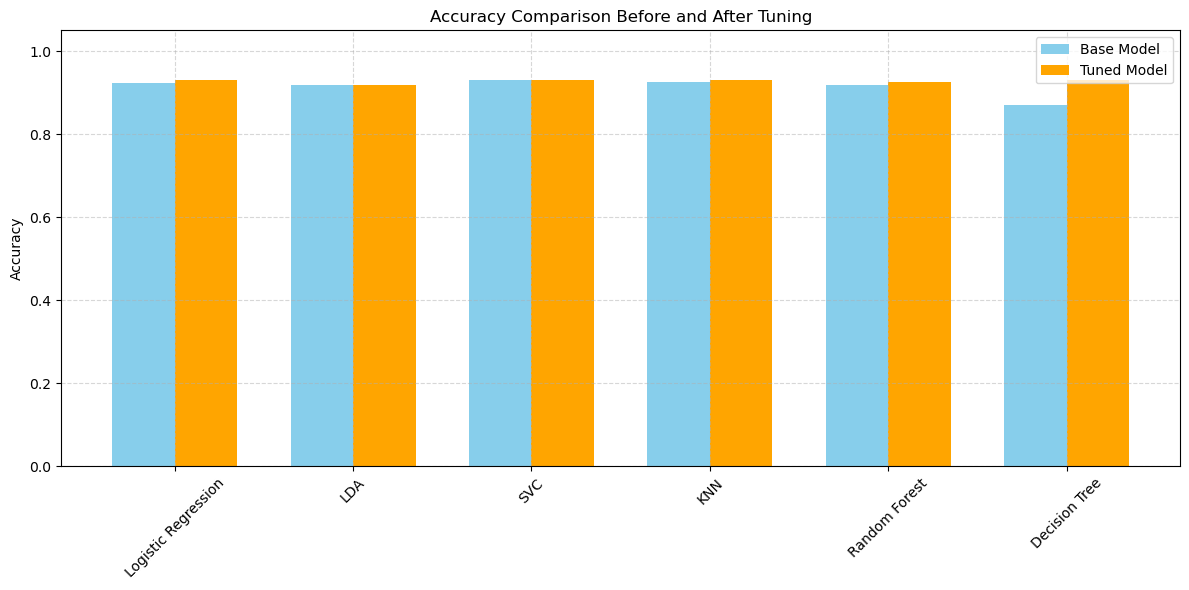

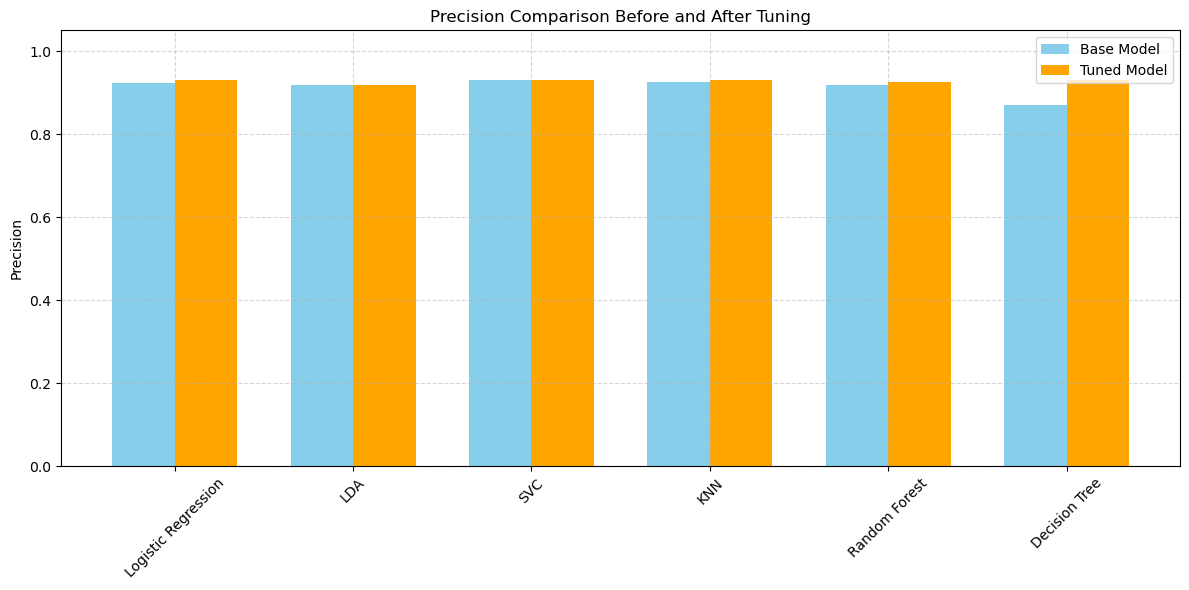

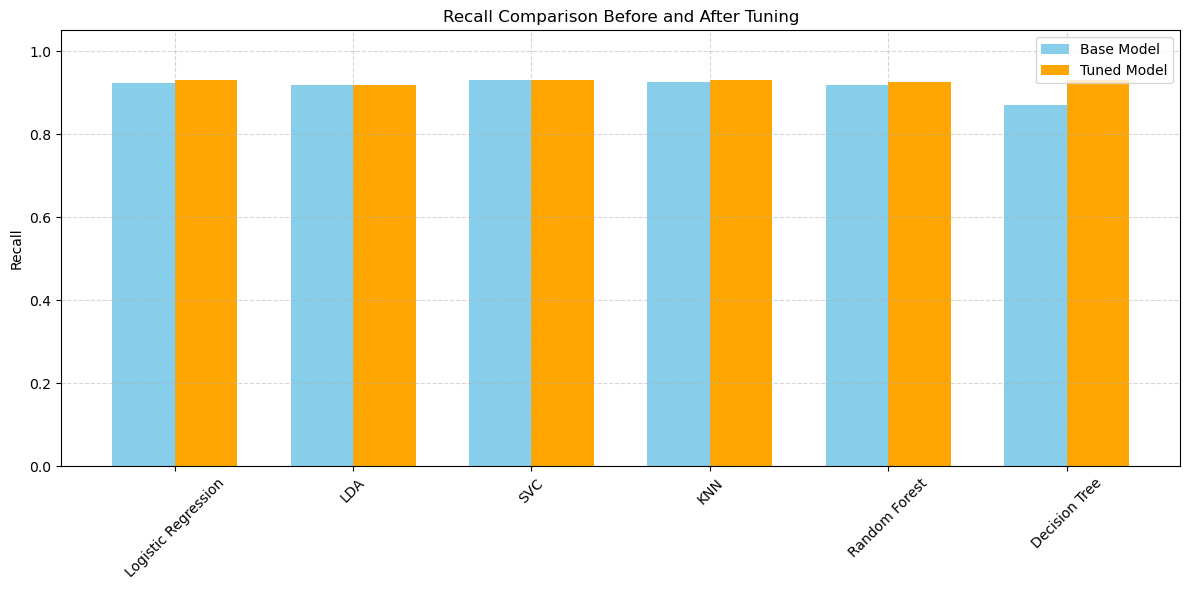

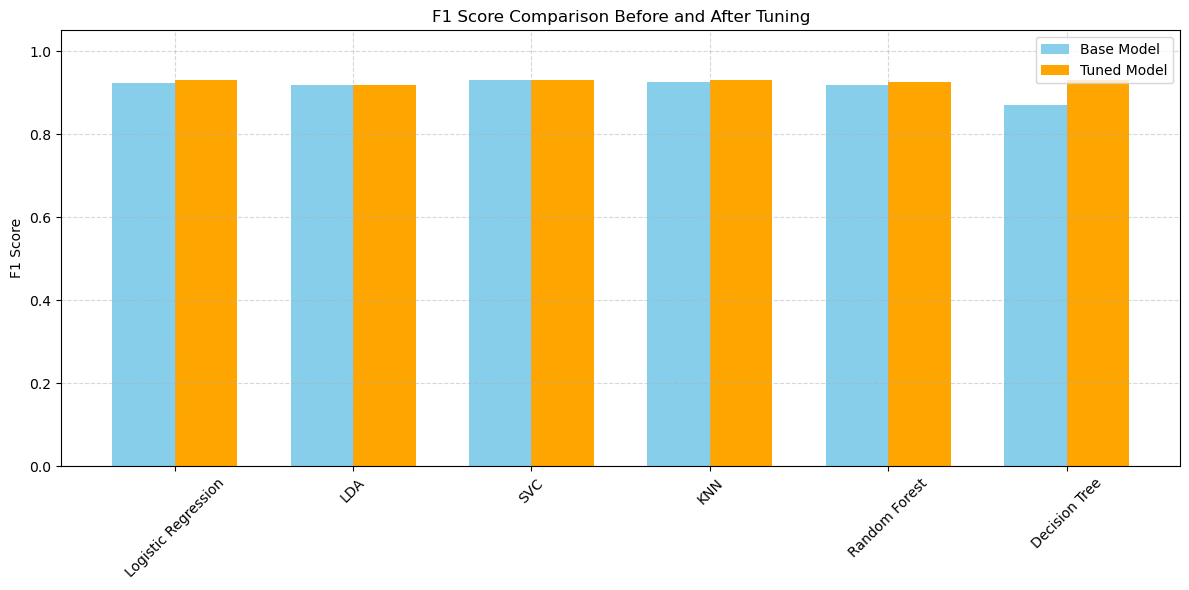

In [20]:
plot_model_scores(base_scores1, tuned_scores1)


# Conclusion

Both in GridSearchCV, RandomizedSearchCV the models:
- Showed no effect in SVC ,LDA.
- Showed  slight diffrence in Logistic Regression, KNN , Random Forest.
- And significant effect in Decision Tree.
 > For all the metrics (Accuracy , Precision , Recall , F1 Score)


In [24]:
import joblib

# 1. Logistic Regression
log_reg = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)
joblib.dump(log_reg, "logistic_regression.pkl")

# 2. LDA
lda = LDA(solver='eigen')
lda.fit(X_train, y_train)
joblib.dump(lda, "lda.pkl")

# 3. SVC
svc = SVC(C=0.1, kernel='rbf', probability=True)
svc.fit(X_train, y_train)
joblib.dump(svc, "svc.pkl")

# 4. KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
joblib.dump(knn, "knn.pkl")

# 5. Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, "random_forest.pkl")

# 6. Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random', random_state=42)
dt.fit(X_train, y_train)
joblib.dump(dt, "decision_tree.pkl")


['decision_tree.pkl']